In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from sklearn.neighbors import LocalOutlierFactor  # pip install scikit-learn

### Load data

In [8]:
df = pd.read_pickle("../data/interim/01_data_processed.pkl")

### Plotting outliers


<AxesSubplot: title={'center': 'acc_x'}, xlabel='[label]'>

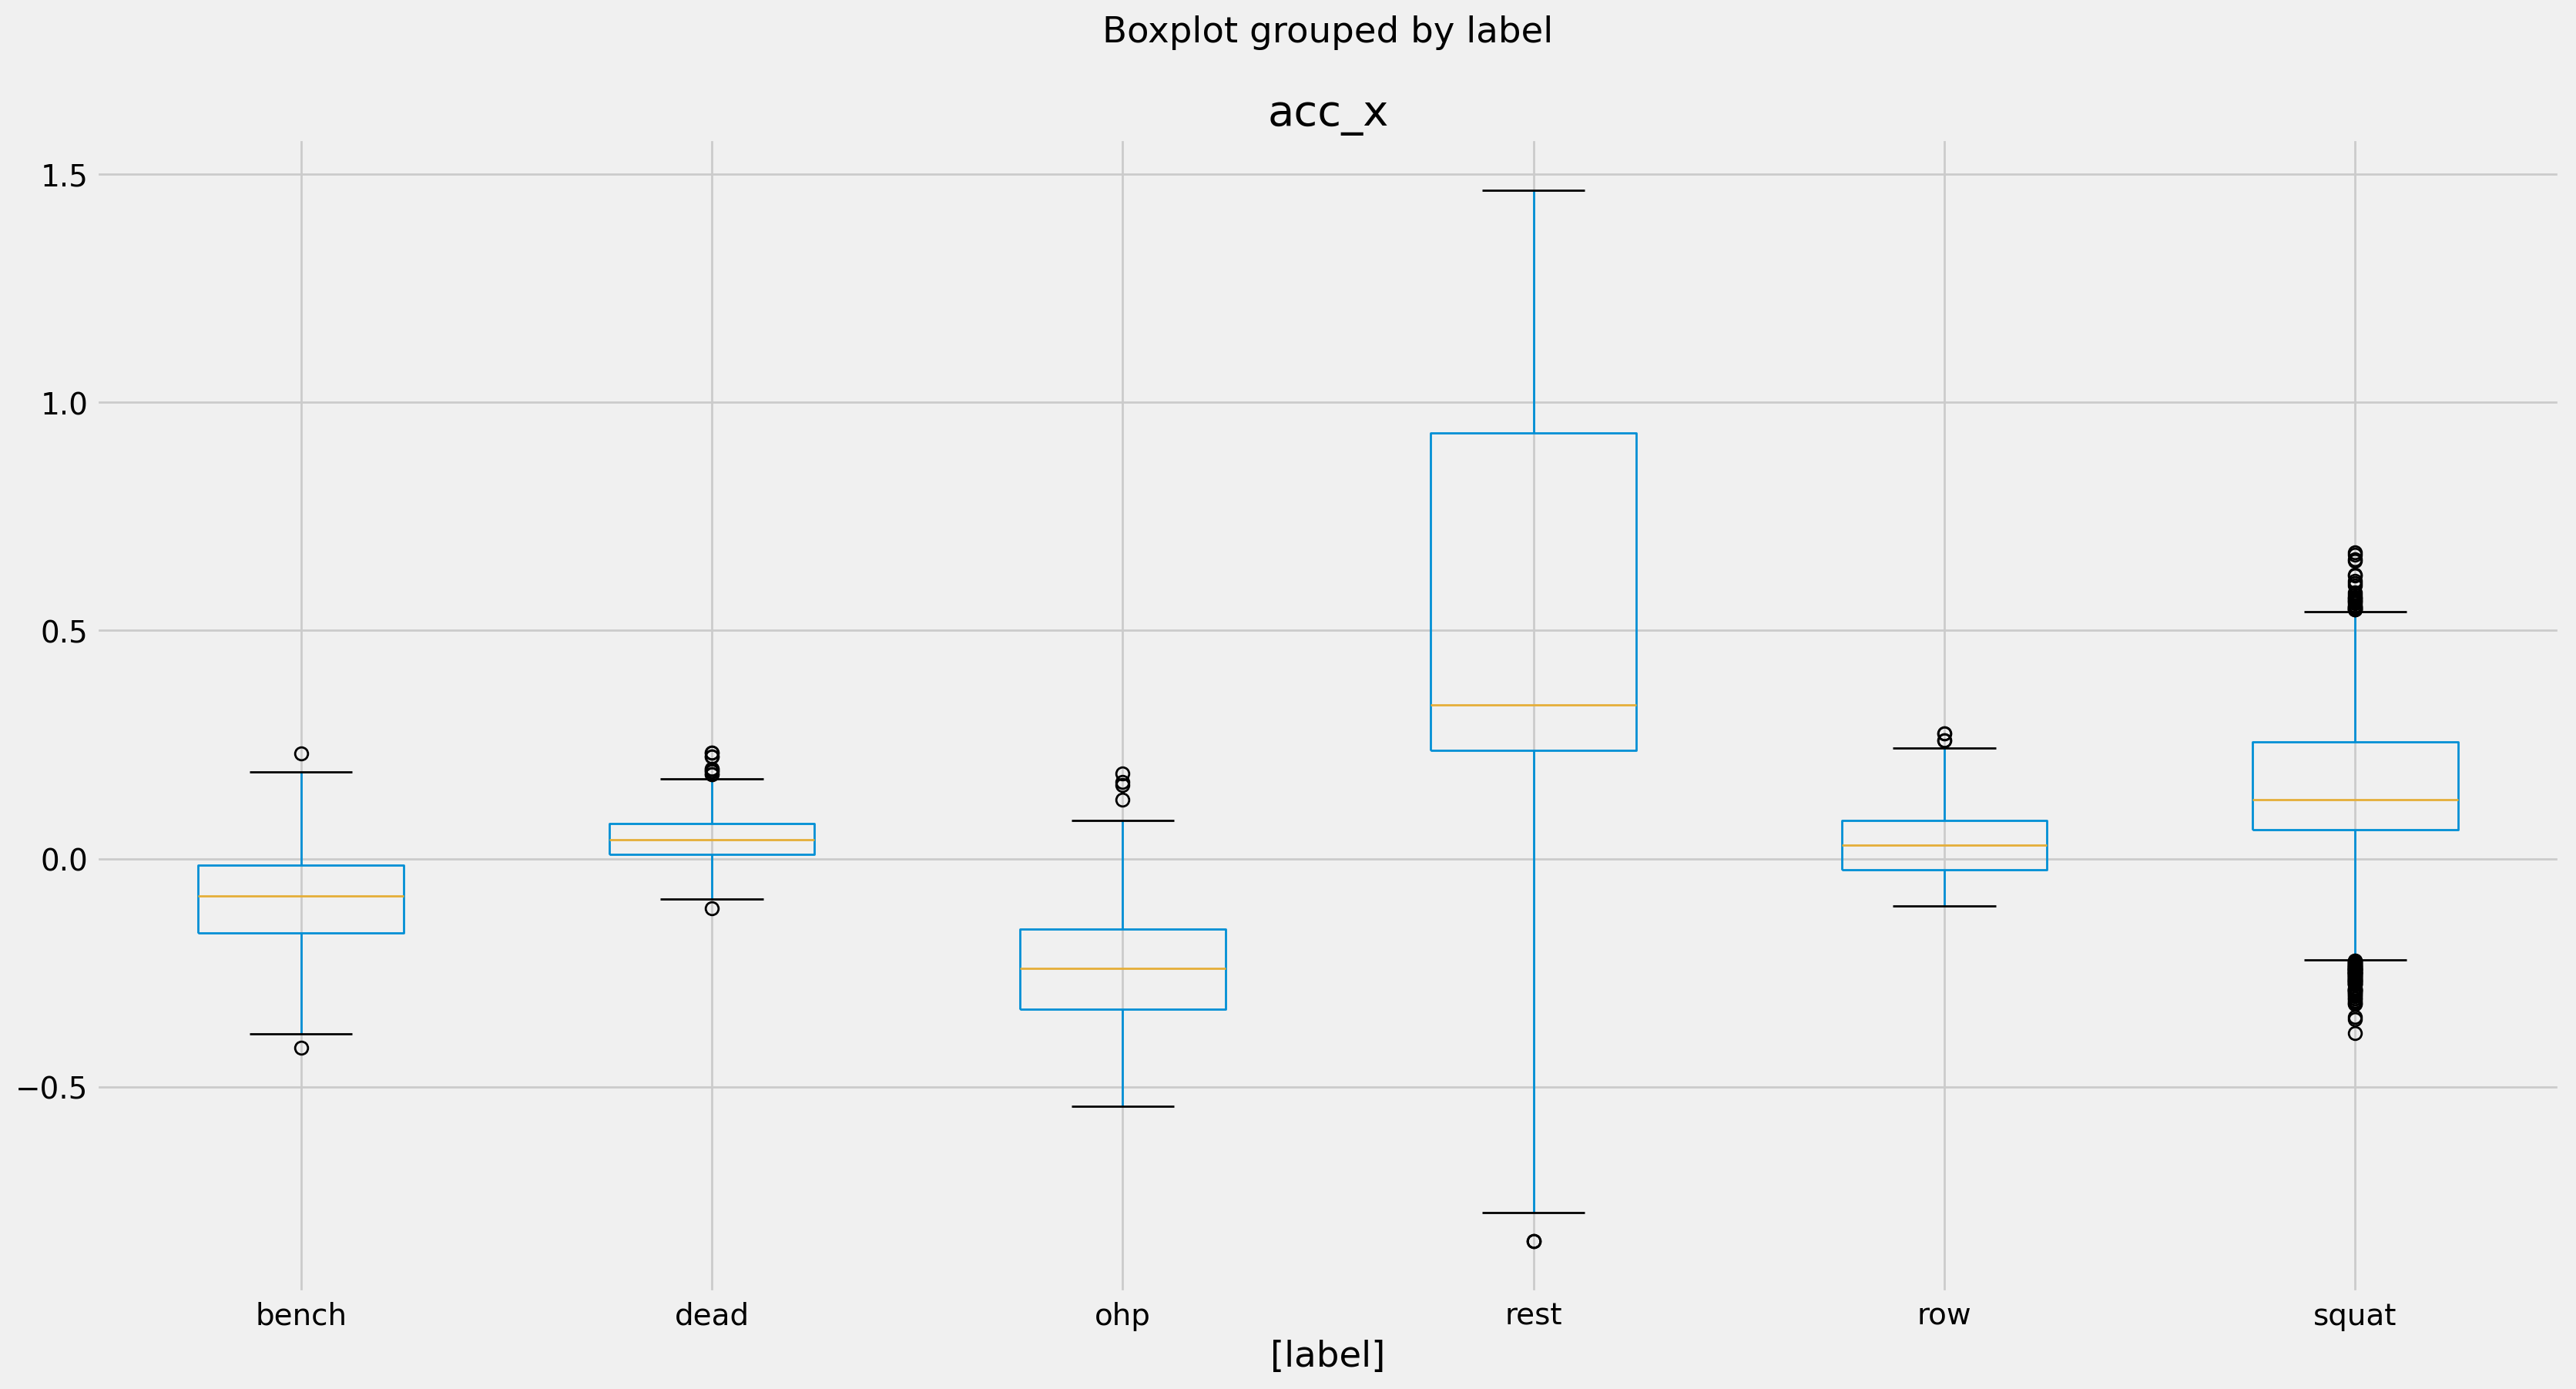

In [12]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 200

df[["acc_x", "label"]].boxplot(by="label", figsize=(20, 10))

array([<AxesSubplot: title={'center': 'gyr_x'}, xlabel='[label]'>,
       <AxesSubplot: title={'center': 'gyr_y'}, xlabel='[label]'>,
       <AxesSubplot: title={'center': 'gyr_z'}, xlabel='[label]'>],
      dtype=object)

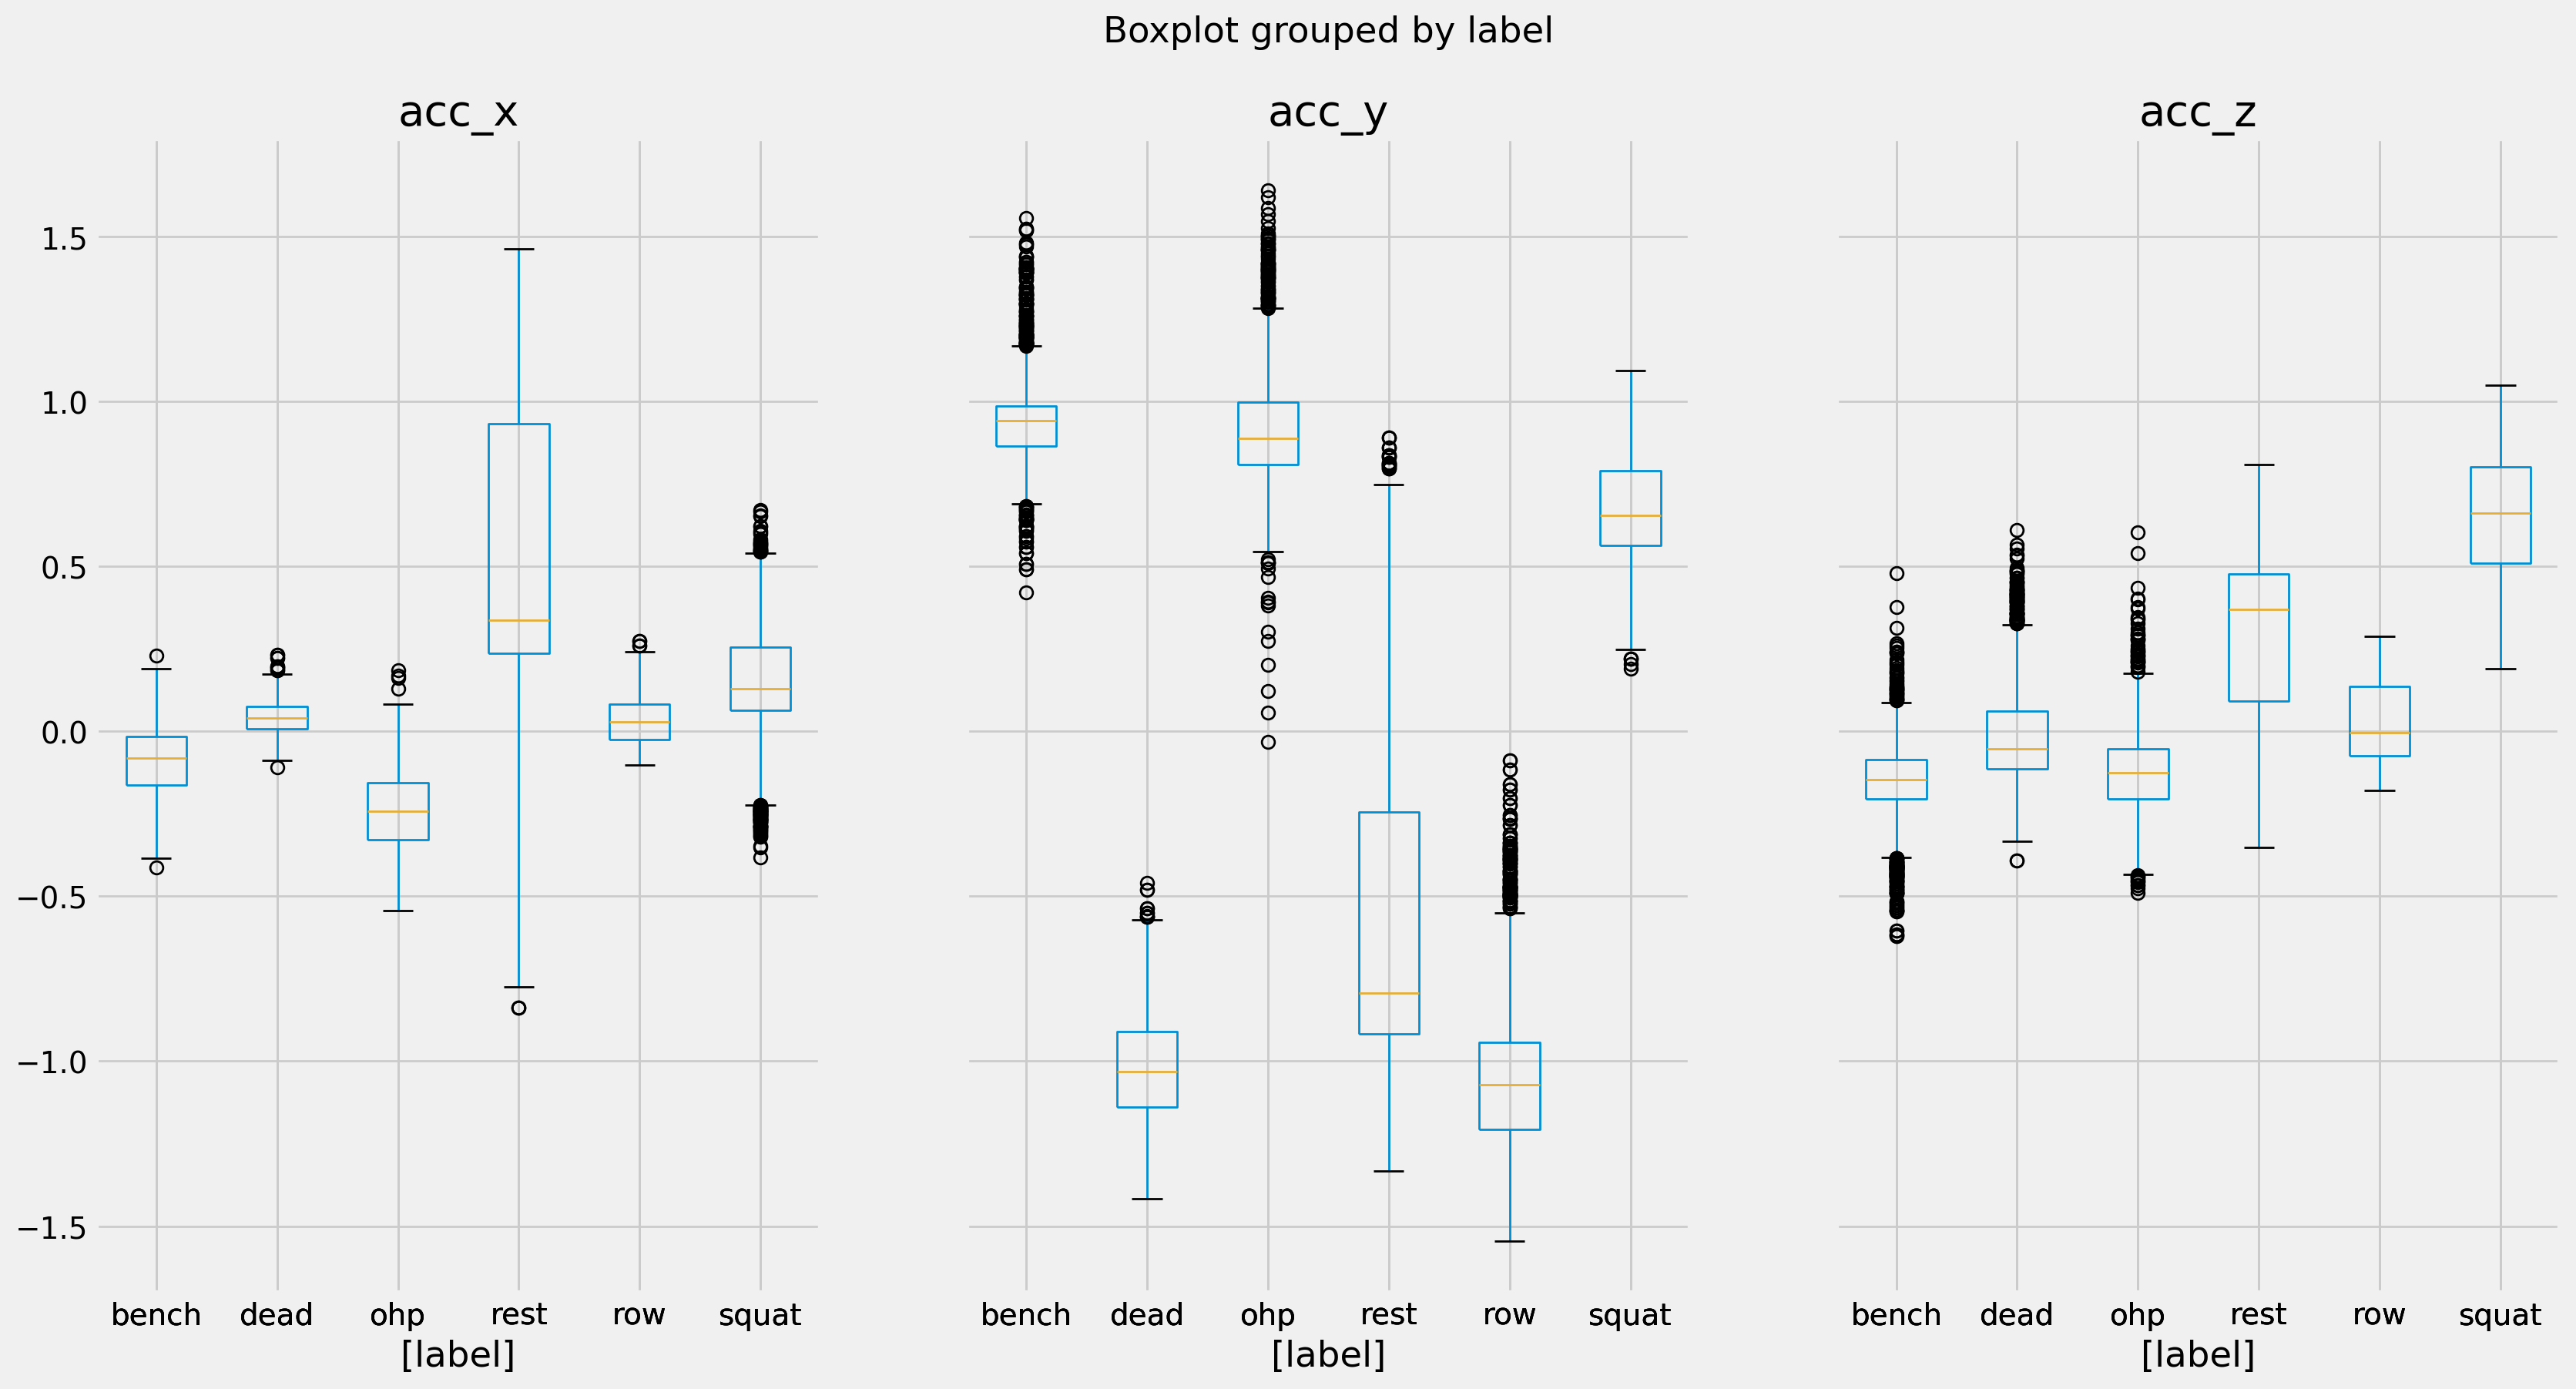

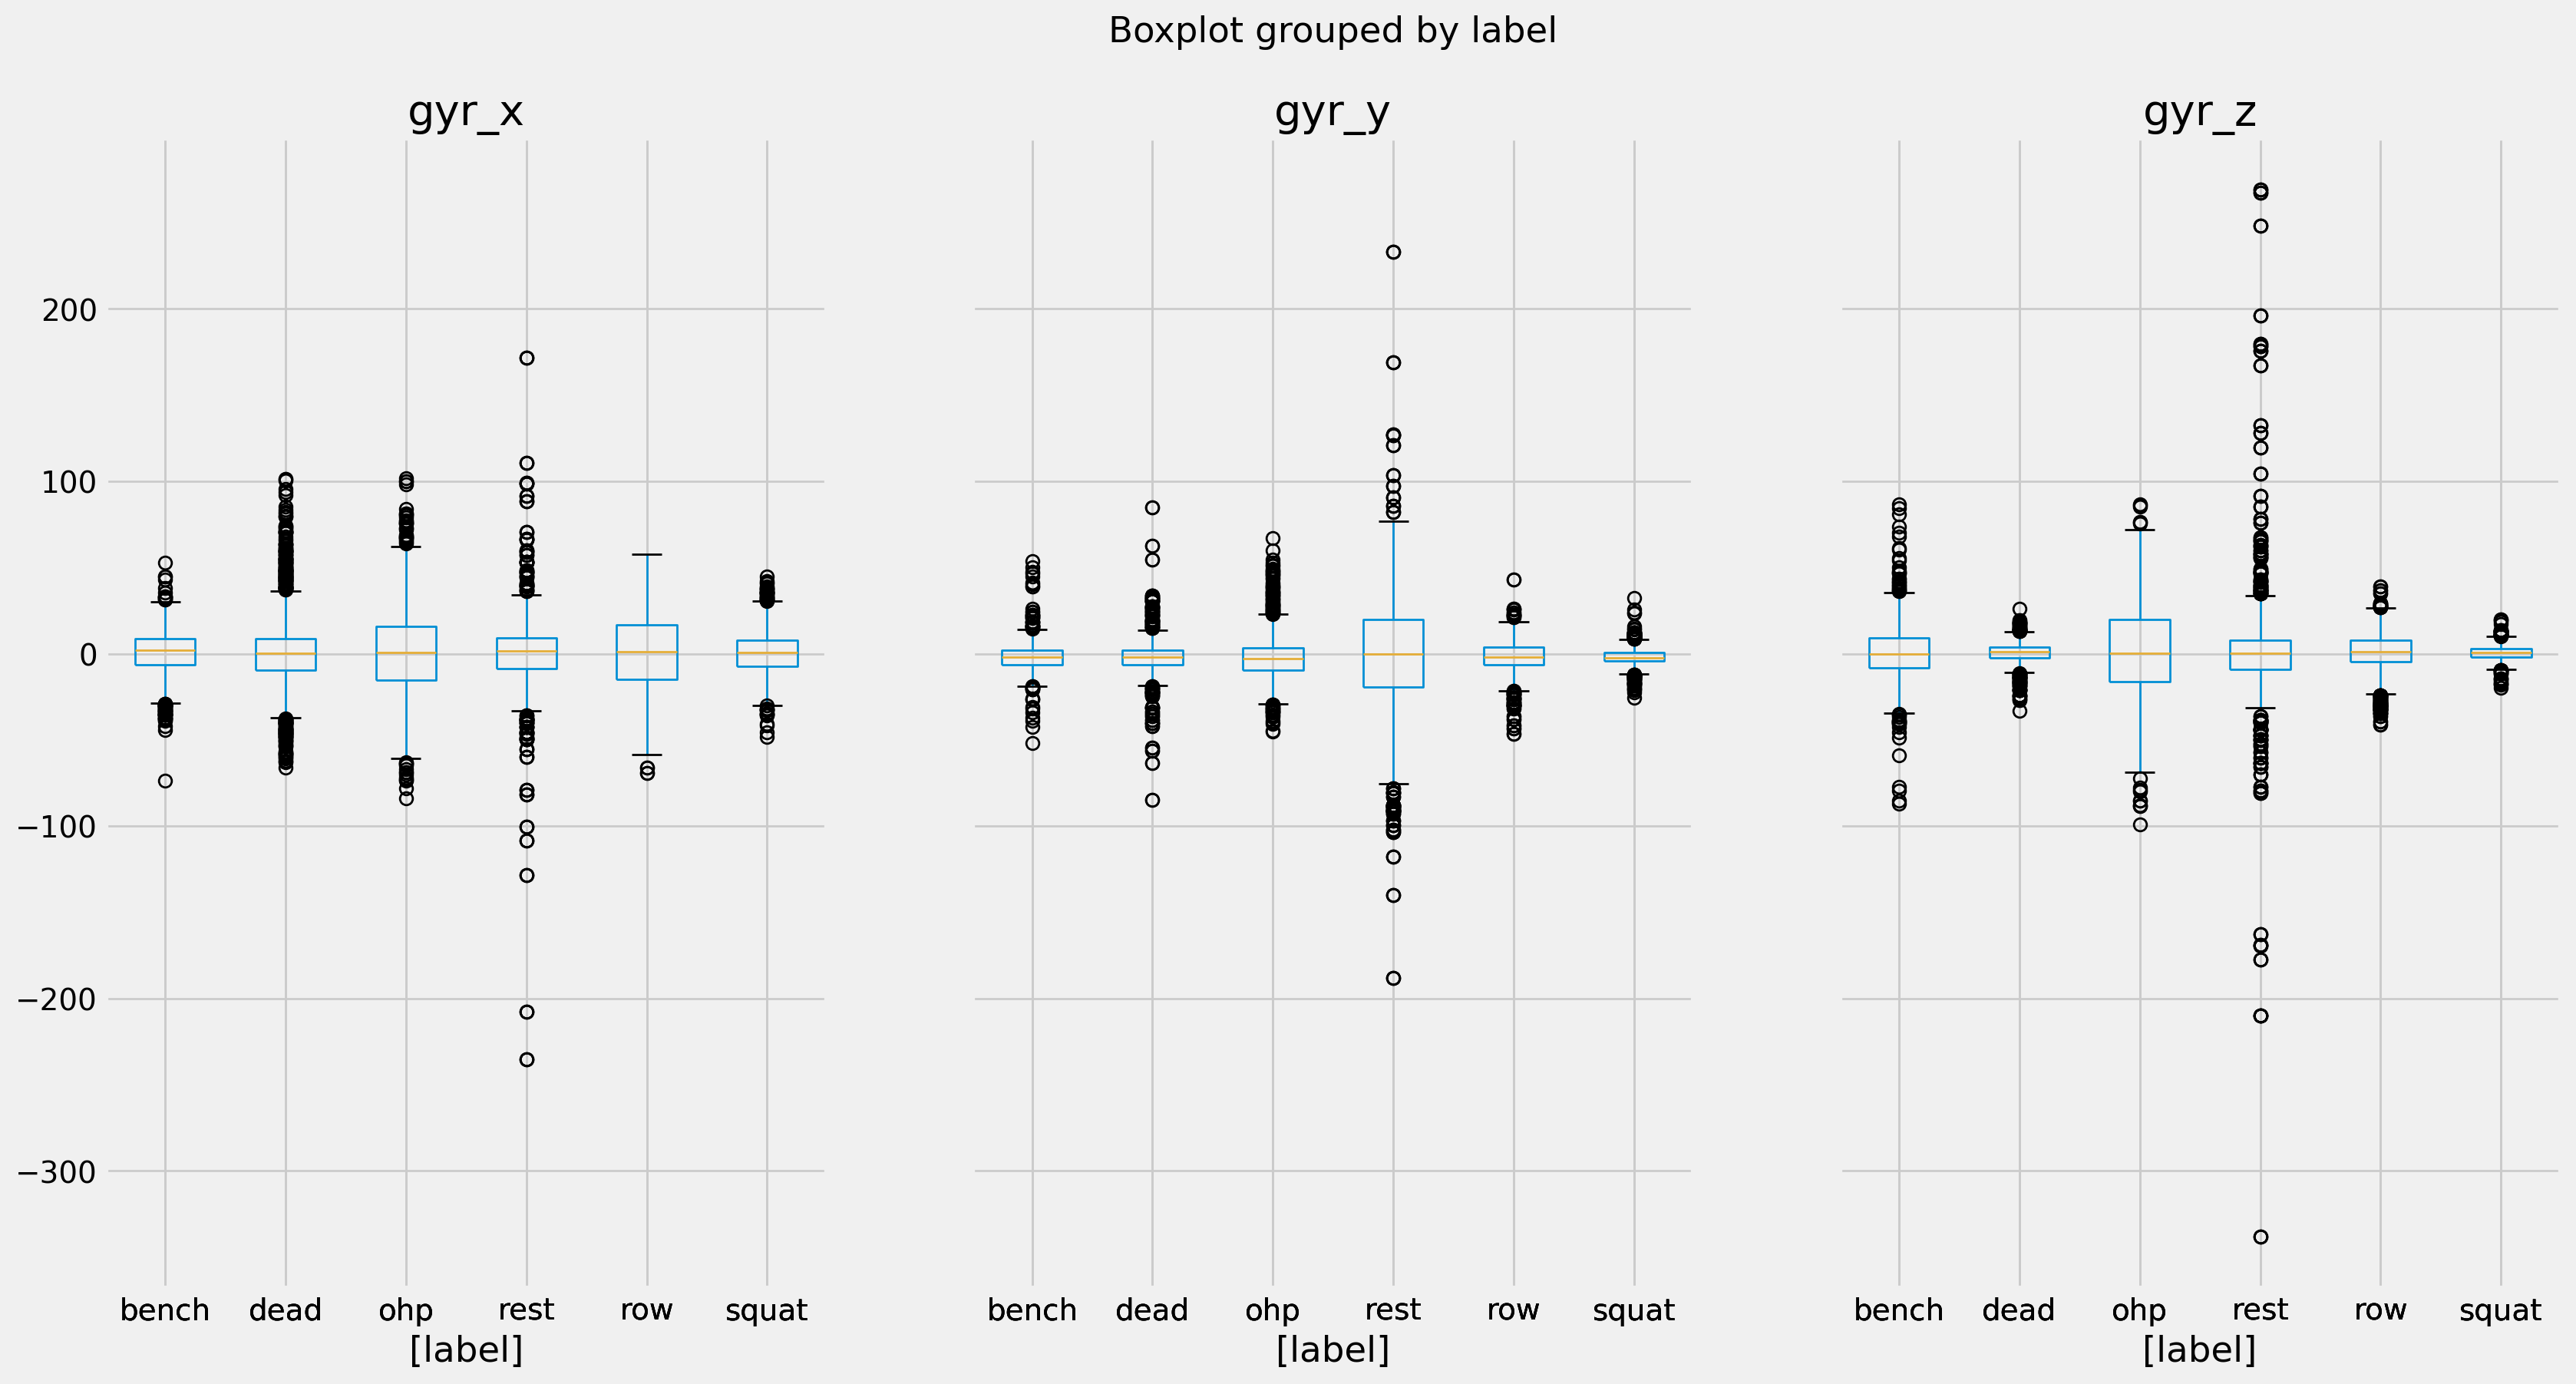

In [19]:
outlier_columns = list(df.columns[:6])
df[outlier_columns[:3] + ["label"]].boxplot(by="label", figsize=(20, 10), layout=(1, 3))
df[outlier_columns[3:] + ["label"]].boxplot(by="label", figsize=(20, 10), layout=(1, 3))


### Interquartile range (distribution based). Visualize over time


In [20]:
def plot_binary_outliers(dataset, col, outlier_col, reset_index):
    """Plot outliers in case of a binary outlier score. Here, the col specifies the real data
    column and outlier_col the columns with a binary value (outlier or not).

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): Column that you want to plot
        outlier_col (string): Outlier column marked with true/false
        reset_index (bool): whether to reset the index for plotting
    """

    # Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/util/VisualizeDataset.py

    dataset = dataset.dropna(axis=0, subset=[col, outlier_col])
    dataset[outlier_col] = dataset[outlier_col].astype("bool")

    if reset_index:
        dataset = dataset.reset_index()

    fig, ax = plt.subplots()

    plt.xlabel("samples")
    plt.ylabel("value")

    # Plot non outliers in default color
    ax.plot(
        dataset.index[~dataset[outlier_col]],
        dataset[col][~dataset[outlier_col]],
        "+",
    )
    # Plot data points that are outliers in red
    ax.plot(
        dataset.index[dataset[outlier_col]],
        dataset[col][dataset[outlier_col]],
        "r+",
    )

    plt.legend(
        ["outlier " + col, "no outlier " + col],
        loc="upper center",
        ncol=2,
        fancybox=True,
        shadow=True,
    )
    plt.show()


### Insert IQR function
##### Plot a single column
##### Loop over all columns


### Chauvenets criteron (distribution based)
##### Check for normal distribution
##### Insert Chauvenet's function
##### Loop over all columns




### Local outlier factor (distance based)
##### Insert LOF function
##### Loop over all columns


### Check outliers grouped by label


### Choose method and deal with outliers
##### Test on single column
##### Create a loop


### Export new dataframe
